# *Thermal Relaxation in a Ti:Sapphire Crystal*

### _Dan T. Abell, Boaz E. Nash, David L. Bruhwiler, RadiaSoft LLC_<br /> _Nicholas B. Goldring, State 33 Inc_

In this demo, we solve the three-dimensional diffusion equation in a cylindrical Ti:sapphire crystal, with Dirichlet boundary condition $u_D$
on the sides and a defined initial condition inside the crystal body.

$$
\begin{align}
  \frac{\partial u}{\partial t}   &= \alpha\nabla^2 u        \quad\text{in a short cylinder} \\
  u    &= u_D  \hphantom{Du}\quad\text{on the side boundary} \\
  u    &= u_0  \hphantom{Du}\quad\;\text{at $t = 0$}
\end{align}
$$
with boundary conditions
$$
\begin{align}
  u_0  &= T_0 \,\Theta(\varepsilon - r), \\
  u_D  &= 0.
\end{align}
$$
Here $\Theta$ denotes the Heaviside step function, which equals one unless its argument is negative, in which case it vanishes.

## Preamble

Needed imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sf

In [2]:
# plt.style.available
plt.rcParams['font.size'] = 15
# plt.style.use('Solarize_Light2')

In [3]:
gr = (1 + np.sqrt(5)) / 2

In [4]:
def tau(alf, a, nmax):
    nu0_n = sf.jn_zeros(0, nmax)
    return (a ** 2 / alf) / (nu0_n **2)

In [5]:
def ufb(u0, alf, a, eps, nmax, r, t):
    nu0_n = sf.jn_zeros(0, nmax)
    arg_coeff   = nu0_n * (eps / a)
    num_coeff   = (arg_coeff) * sf.j1(arg_coeff)
    denom_coeff = (nu0_n * sf.j1(nu0_n)) ** 2
    tau_n       = (a ** 2 / alf) / (nu0_n **2)
    coeff       = (2 * u0) * (num_coeff / denom_coeff) * np.exp(-t / tau_n)
    u_vals      = np.dot(coeff, sf.j0(nu0_n * (r / a)))
    return u_vals

In [6]:
def ueq(f0, alf, a, eps, nmax, r):
    nu0_n = sf.jn_zeros(0, nmax)
    arg_coeff   = nu0_n * (eps / a)
    num_coeff   = (arg_coeff) * sf.j1(arg_coeff)
    denom_coeff = (nu0_n * sf.j1(nu0_n)) ** 2
    coeff       = (2 * f0) * (num_coeff / denom_coeff)
    coeff_eq    = (a ** 2 / alf) / (nu0_n ** 2) * coeff
    u_val       = np.dot(coeff_eq, sf.j0(nu0_n * (r / a)))
    return u_val

### $a = 7.50\,\mathrm{mm}$, $\varepsilon = a/10$

In [7]:
alf =  7.98  # / (mm^2 / s)
a   =  7.50  # / mm
eps =  0.10 * a
src = 658.25

In [26]:
alf, eps, a, nmax, src

(7.98, 0.75, 7.5, 100, 658.25)

In [27]:
nmax = 100
nntn = np.array([ (nn, ueq(src, alf, a, eps, nn, 0.)) for nn in range(1, nmax) ])

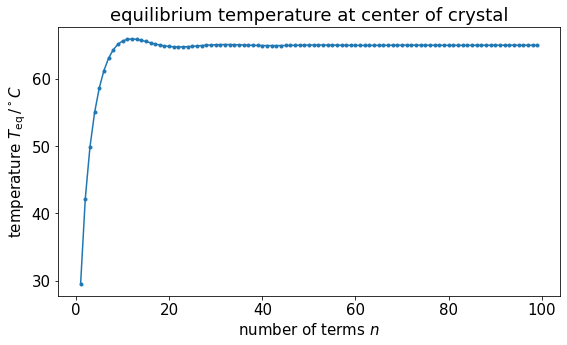

In [28]:
nf = None
plt.figure(figsize = (9, 9/1.818))
plt.plot(nntn[:nf,0], nntn[:nf,1], '.-')
plt.xlabel('number of terms $n$')
plt.ylabel('temperature $T_{\mathrm{eq}}\,/ ^\circ C$')
plt.title('equilibrium temperature at center of crystal')
plt.savefig('Teq_v_n.png')
plt.show()

In [29]:
npts = 250
dr = a / npts
r_vals = [ dr * f for f in range(0, npts + 1)]

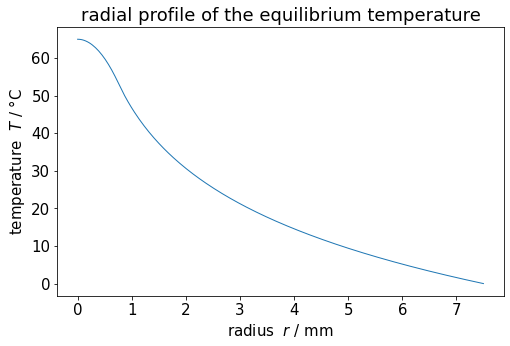

In [30]:
sz_h = 8.
sz_v = sz_h / gr
plt.figure(figsize = (sz_h, sz_v))

u_vals_eq = [ ueq(src, alf, a, eps, nmax, r) for r in r_vals ]
plt.plot(r_vals, u_vals_eq, '-', lw = 1., label = r'$0.3\,s$')
plt.xlabel('radius  $r$ / mm')
plt.ylabel('temperature  $T$ / °C')
plt.title('radial profile of the equilibrium temperature')
plt.savefig('Teq_v_r.png')
plt.show()

In [36]:
def u_vals(src, alf, a, eps, nmax, r_vals):
    return [ ueq(src, alf, a, eps, nmax, r) for r in r_vals ]

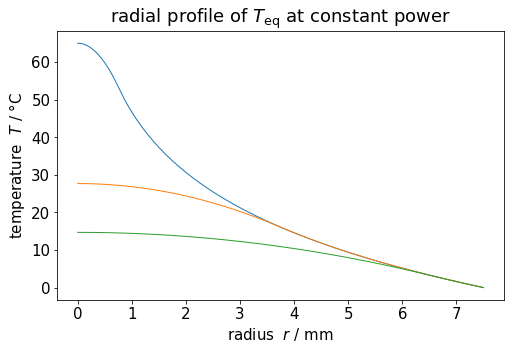

In [43]:
sz_h = 8.
sz_v = sz_h / gr
plt.figure(figsize = (sz_h, sz_v))

plt.plot(r_vals, u_vals(src, alf, a, a / 10, nmax, r_vals), '-', lw = 1., label = r'$0.3\,s$')
plt.plot(r_vals, u_vals(src * ((1/10) / (1/2)) ** 2, alf, a, a /  2, nmax, r_vals), '-', lw = 1., label = r'$0.3\,s$')
plt.plot(r_vals, u_vals(src * ((1/10) / (7/8)) ** 2, alf, a, 7 * a / 8, nmax, r_vals), '-', lw = 1., label = r'$0.3\,s$')
plt.xlabel('radius  $r$ / mm')
plt.ylabel('temperature  $T$ / °C')
plt.title('radial profile of $T_\mathrm{eq}$ at constant power')
plt.savefig('Teq_v_r.png')
plt.show()

### $\varepsilon = 1.00\,\mathrm{mm}$

In [10]:
u0  = 20.00  # / °C
alf =  7.98  # / mm^2 / s
a   =  7.50  # / mm
eps =  1.00  # / mm

nmax = 100

In [11]:
npts = 250
dr = a / npts
r_vals = [ dr * f for f in range(0, npts + 1)]
u_vals00 = [ ufb(u0, alf, a, eps, nmax, r, 0.0) for r in r_vals ]
u_vals01 = [ ufb(u0, alf, a, eps, nmax, r, 0.1) for r in r_vals ]
u_vals02 = [ ufb(u0, alf, a, eps, nmax, r, 0.2) for r in r_vals ]
u_vals03 = [ ufb(u0, alf, a, eps, nmax, r, 0.3) for r in r_vals ]
u_vals04 = [ ufb(u0, alf, a, eps, nmax, r, 0.4) for r in r_vals ]
u_vals05 = [ ufb(u0, alf, a, eps, nmax, r, 0.5) for r in r_vals ]
u_vals06 = [ ufb(u0, alf, a, eps, nmax, r, 0.6) for r in r_vals ]
u_vals07 = [ ufb(u0, alf, a, eps, nmax, r, 0.7) for r in r_vals ]
u_vals08 = [ ufb(u0, alf, a, eps, nmax, r, 0.8) for r in r_vals ]
u_vals09 = [ ufb(u0, alf, a, eps, nmax, r, 0.9) for r in r_vals ]
u_vals10 = [ ufb(u0, alf, a, eps, nmax, r, 1.0) for r in r_vals ]
u_vals11 = [ ufb(u0, alf, a, eps, nmax, r, 1.1) for r in r_vals ]
u_vals12 = [ ufb(u0, alf, a, eps, nmax, r, 1.2) for r in r_vals ]
u_vals13 = [ ufb(u0, alf, a, eps, nmax, r, 1.3) for r in r_vals ]
u_vals14 = [ ufb(u0, alf, a, eps, nmax, r, 1.4) for r in r_vals ]
u_vals15 = [ ufb(u0, alf, a, eps, nmax, r, 1.5) for r in r_vals ]

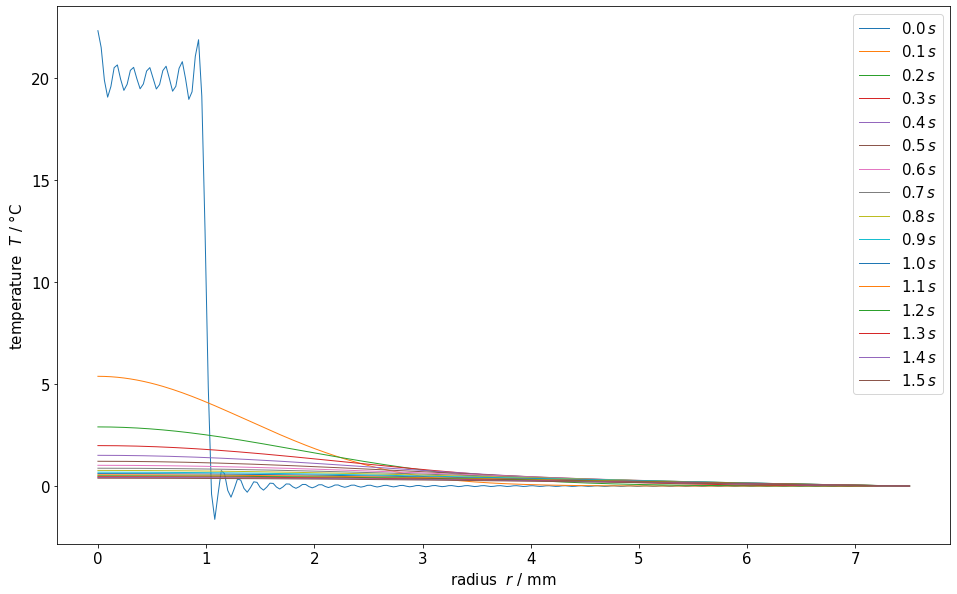

In [12]:
sz_h = 16.
sz_v = sz_h / gr
plt.figure(figsize = (sz_h, sz_v))

plt.plot(r_vals, u_vals00, '-', lw = 1., label = r'$0.0\,s$')
plt.plot(r_vals, u_vals01, '-', lw = 1., label = r'$0.1\,s$')
plt.plot(r_vals, u_vals02, '-', lw = 1., label = r'$0.2\,s$')
plt.plot(r_vals, u_vals03, '-', lw = 1., label = r'$0.3\,s$')
plt.plot(r_vals, u_vals04, '-', lw = 1., label = r'$0.4\,s$')
plt.plot(r_vals, u_vals05, '-', lw = 1., label = r'$0.5\,s$')
plt.plot(r_vals, u_vals06, '-', lw = 1., label = r'$0.6\,s$')
plt.plot(r_vals, u_vals07, '-', lw = 1., label = r'$0.7\,s$')
plt.plot(r_vals, u_vals08, '-', lw = 1., label = r'$0.8\,s$')
plt.plot(r_vals, u_vals09, '-', lw = 1., label = r'$0.9\,s$')
plt.plot(r_vals, u_vals10, '-', lw = 1., label = r'$1.0\,s$')
plt.plot(r_vals, u_vals11, '-', lw = 1., label = r'$1.1\,s$')
plt.plot(r_vals, u_vals12, '-', lw = 1., label = r'$1.2\,s$')
plt.plot(r_vals, u_vals13, '-', lw = 1., label = r'$1.3\,s$')
plt.plot(r_vals, u_vals14, '-', lw = 1., label = r'$1.4\,s$')
plt.plot(r_vals, u_vals15, '-', lw = 1., label = r'$1.5\,s$')
plt.xlabel('radius  $r$ / mm')
plt.ylabel('temperature  $T$ / °C')
plt.legend()
plt.show()


### $\varepsilon = 1.00\,\mathrm{mm}$, $a = 10.00\,\mathrm{mm}$

In [24]:
u0  = 20.00  # / °C
alf =  7.98  # / mm^2 / s
a   =  7.50  # / mm
eps =  0.75  # / mm

nmax = 100

In [25]:
sf.j0(0), sf.j1(0)

(1.0, 0.0)

In [43]:
nntn = np.array([ (nn, ueq(1.0 * 658.25, alf, a, eps, nn, 0.)) for nn in range(1,100) ])

In [34]:
[ ueq(658.25, alf, a, eps, nn, 0.) for nn in range(1,100) ]

[29.55415299848541,
 42.21135615322474,
 49.85690013687916,
 55.0195285403022,
 58.659266323568765,
 61.254472866831115,
 63.08767836184664,
 64.3469298002705,
 65.16864755606609,
 65.65791362919212,
 65.89882561056957,
 65.96006985255208,
 65.89806380451154,
 65.75883502886549,
 65.5792550253069,
 65.38796835746949,
 65.20620625744264,
 65.04858569274354,
 64.9239406262635,
 64.836197688734,
 64.7852864803783,
 64.76806133169443,
 64.77920432443717,
 64.8120772394808,
 64.85949177124354,
 64.91437191194314,
 64.97028902325938,
 65.02185798284799,
 65.0649911691011,
 65.09701524353152,
 65.11666310786615,
 65.12395956598068,
 65.12002375427763,
 65.10681410668225,
 65.08684242750533,
 65.06288263282705,
 65.03769708983353,
 65.01379953705685,
 64.99326868376636,
 64.97762118234678,
 64.96774717013174,
 64.96390638999507,
 64.96577837342456,
 64.97255658278884,
 64.98307394791637,
 64.99594598468664,
 65.00971764063934,
 65.02300107436139,
 65.03459356436214,
 65.04356742396537,
 65.049

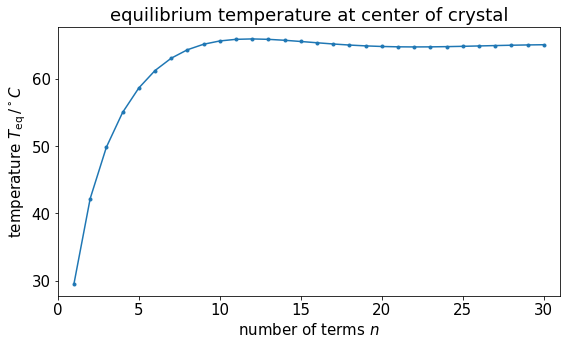

In [59]:
plt.figure(figsize = (9, 9/1.818))
plt.plot(nntn[:30,0], nntn[:30,1], '.-')
plt.xlim(0,31)
plt.xlabel('number of terms $n$')
plt.ylabel('temperature $T_{\mathrm{eq}}\,/ ^\circ C$')
plt.title('equilibrium temperature at center of crystal')
plt.savefig('Teq_v_n.png')
plt.show()

In [28]:
alf, eps, a, nmax

(7.98, 0.75, 7.5, 100)

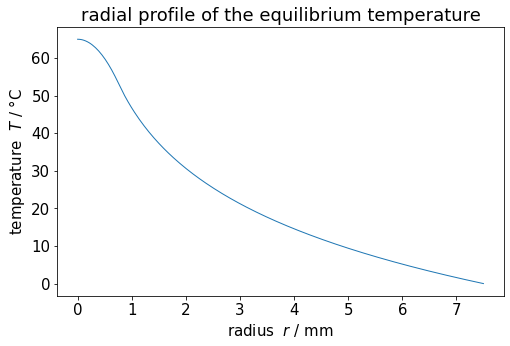

In [58]:
sz_h = 8.
sz_v = sz_h / gr
plt.figure(figsize = (sz_h, sz_v))

u_vals_eq = [ ueq(658.25, alf, a, eps, nmax, r) for r in r_vals ]
plt.plot(r_vals, u_vals_eq, '-', lw = 1., label = r'$0.3\,s$')
plt.xlabel('radius  $r$ / mm')
plt.ylabel('temperature  $T$ / °C')
plt.title('radial profile of the equilibrium temperature')
plt.savefig('Teq_v_r.png')
plt.show()

### $\varepsilon = 1.5\,\mathrm{mm}$

In [9]:
u0  = 20.00  # / °C
alf =  7.98  # / mm^2 / s
a   =  7.50  # / mm
eps =  1.50  # / mm

nmax = 100

In [10]:
npts = 250
dr = a / npts
r_vals = [ dr * f for f in range(0, npts + 1)]
u_vals00 = [ ufb(u0, alf, a, eps, nmax, r, 0.0) for r in r_vals ]
u_vals01 = [ ufb(u0, alf, a, eps, nmax, r, 0.1) for r in r_vals ]
u_vals02 = [ ufb(u0, alf, a, eps, nmax, r, 0.2) for r in r_vals ]
u_vals03 = [ ufb(u0, alf, a, eps, nmax, r, 0.3) for r in r_vals ]
u_vals04 = [ ufb(u0, alf, a, eps, nmax, r, 0.4) for r in r_vals ]
u_vals05 = [ ufb(u0, alf, a, eps, nmax, r, 0.5) for r in r_vals ]
u_vals06 = [ ufb(u0, alf, a, eps, nmax, r, 0.6) for r in r_vals ]
u_vals07 = [ ufb(u0, alf, a, eps, nmax, r, 0.7) for r in r_vals ]
u_vals08 = [ ufb(u0, alf, a, eps, nmax, r, 0.8) for r in r_vals ]
u_vals09 = [ ufb(u0, alf, a, eps, nmax, r, 0.9) for r in r_vals ]
u_vals10 = [ ufb(u0, alf, a, eps, nmax, r, 1.0) for r in r_vals ]
u_vals11 = [ ufb(u0, alf, a, eps, nmax, r, 1.1) for r in r_vals ]
u_vals12 = [ ufb(u0, alf, a, eps, nmax, r, 1.2) for r in r_vals ]
u_vals13 = [ ufb(u0, alf, a, eps, nmax, r, 1.3) for r in r_vals ]
u_vals14 = [ ufb(u0, alf, a, eps, nmax, r, 1.4) for r in r_vals ]
u_vals15 = [ ufb(u0, alf, a, eps, nmax, r, 1.5) for r in r_vals ]

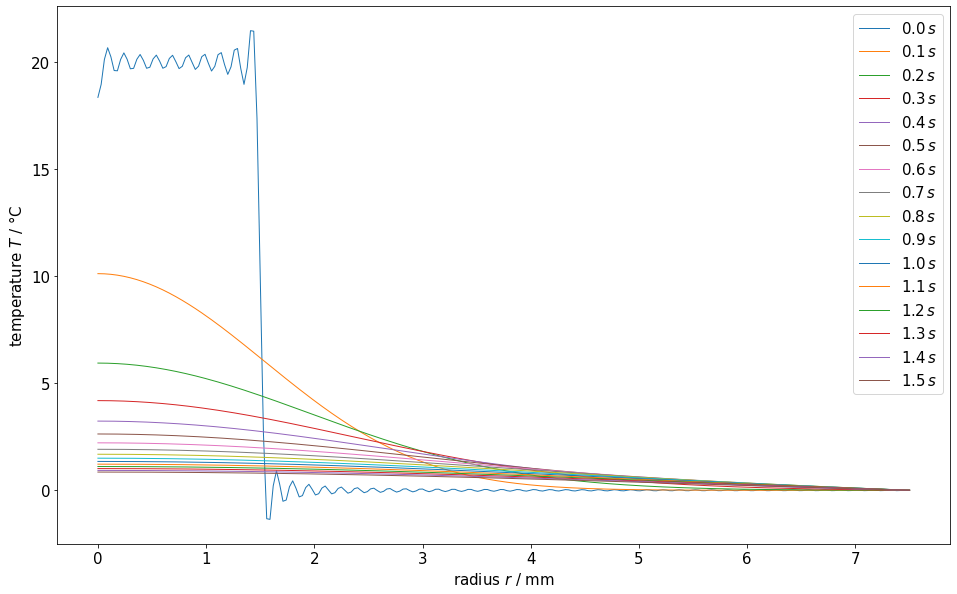

In [11]:
sz_h = 16.
sz_v = sz_h / gr
plt.figure(figsize = (sz_h, sz_v))

plt.plot(r_vals, u_vals00, '-', lw = 1., label = r'$0.0\,s$')
plt.plot(r_vals, u_vals01, '-', lw = 1., label = r'$0.1\,s$')
plt.plot(r_vals, u_vals02, '-', lw = 1., label = r'$0.2\,s$')
plt.plot(r_vals, u_vals03, '-', lw = 1., label = r'$0.3\,s$')
plt.plot(r_vals, u_vals04, '-', lw = 1., label = r'$0.4\,s$')
plt.plot(r_vals, u_vals05, '-', lw = 1., label = r'$0.5\,s$')
plt.plot(r_vals, u_vals06, '-', lw = 1., label = r'$0.6\,s$')
plt.plot(r_vals, u_vals07, '-', lw = 1., label = r'$0.7\,s$')
plt.plot(r_vals, u_vals08, '-', lw = 1., label = r'$0.8\,s$')
plt.plot(r_vals, u_vals09, '-', lw = 1., label = r'$0.9\,s$')
plt.plot(r_vals, u_vals10, '-', lw = 1., label = r'$1.0\,s$')
plt.plot(r_vals, u_vals11, '-', lw = 1., label = r'$1.1\,s$')
plt.plot(r_vals, u_vals12, '-', lw = 1., label = r'$1.2\,s$')
plt.plot(r_vals, u_vals13, '-', lw = 1., label = r'$1.3\,s$')
plt.plot(r_vals, u_vals14, '-', lw = 1., label = r'$1.4\,s$')
plt.plot(r_vals, u_vals15, '-', lw = 1., label = r'$1.5\,s$')
plt.xlabel('radius $r$ / mm')
plt.ylabel('temperature $T$ / °C')
# plt.title(r'PTC Twiss analysis (5D v. 6D) for the Los Alamos PSR')
plt.legend()
plt.show()


In [12]:
upk_theory = [
    u_vals00[0], u_vals01[0], u_vals02[0], u_vals03[0], u_vals04[0],
    u_vals05[0], u_vals06[0], u_vals07[0], u_vals08[0], u_vals09[0],
    u_vals10[0], u_vals11[0], u_vals12[0], u_vals13[0], u_vals14[0],
    u_vals15[0]]

upk_theory[0] = 20 ## correct the initial value!

In [13]:
upk_fenics = [20.0,
    10.414737191389891, 6.002124970611824, 4.204554726220573, 3.235826841928973, 2.630281994493335,
    2.215645277635433, 1.9132593775480098, 1.6819120334022502, 1.497906518944128, 1.3467512291964892,
    1.2192158558164208, 1.1092508449591614, 1.0127989174144432, 0.9270787438357673, 0.850138600392724]

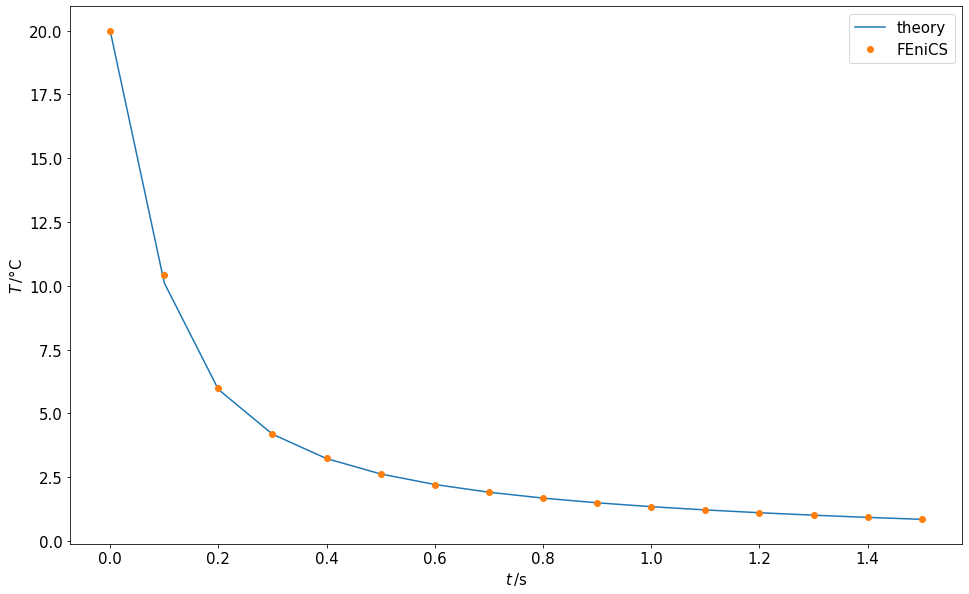

In [14]:
sz_h = 16.
sz_v = sz_h / gr
plt.figure(figsize = (sz_h, sz_v))

tvals = 0.1 * np.array(range(16))
plt.plot(tvals, upk_theory, '-', label = 'theory')
plt.plot(tvals, upk_fenics, '.', ms = 12, label = 'FEniCS')
plt.xlabel(r'$t\,/\mathrm{s}$')
plt.ylabel(r'$T\,/\mathrm{°C}$')
plt.legend()
plt.show()

In [15]:
tvals_fenics = 0.1 * np.array(range(16))
upk_fenics = [20.0,
    10.414737191389891, 6.002124970611824, 4.204554726220573, 3.235826841928973, 2.630281994493335,
    2.215645277635433, 1.9132593775480098, 1.6819120334022502, 1.497906518944128, 1.3467512291964892,
    1.2192158558164208, 1.1092508449591614, 1.0127989174144432, 0.9270787438357673, 0.850138600392724]

In [18]:
nts = 150
t_fin = 1.5
dt = t_fin / nts

tvals_theory = [ dt * t for t in range(0, nts + 1)]
upk_theory = [ ufb(u0, alf, a, 1.5, nmax, 0.0, t) for t in tvals_theory ]

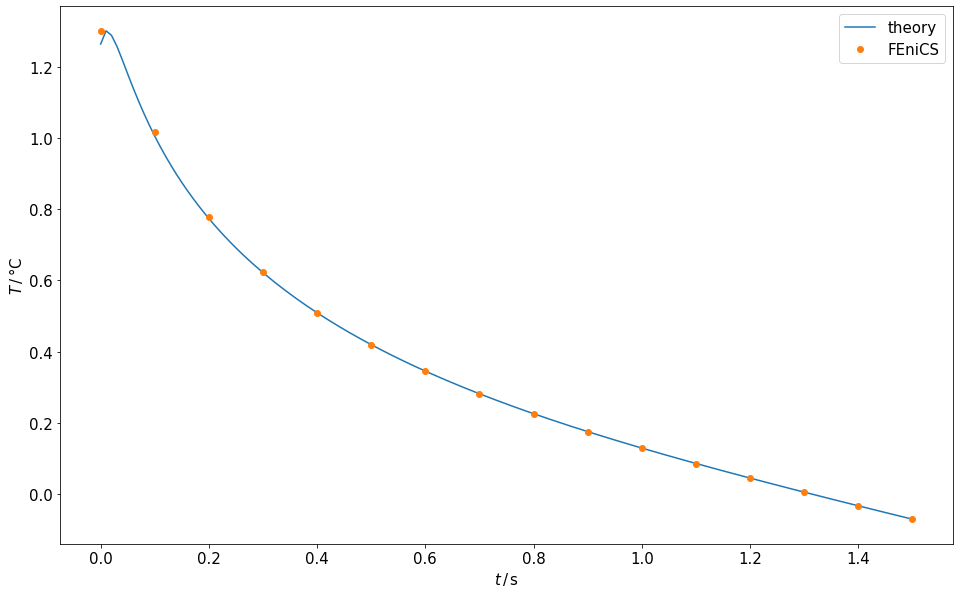

In [20]:
sz_h = 16.
sz_v = sz_h / gr
plt.figure(figsize = (sz_h, sz_v))

plt.plot(tvals_theory, np.log10(upk_theory), '-', label = 'theory')
plt.plot(tvals_fenics, np.log10(upk_fenics), '.', ms = 12, label = 'FEniCS')
plt.xlabel(r'$t\,/\,\mathrm{s}$')
plt.ylabel(r'$T\,/\,\mathrm{°C}$')
plt.legend()
plt.show()

### $\varepsilon = 2.0\,\mathrm{mm}$

In [19]:
u0  = 20.00  # / °C
alf =  7.98  # / mm^2 / s
a   =  7.50  # / mm
eps =  2.00  # / mm

nmax = 100

In [20]:
npts = 250
dr = a / npts
r_vals = [ dr * f for f in range(0, npts + 1)]
u_vals00 = [ ufb(u0, alf, a, eps, nmax, r, 0.0) for r in r_vals ]
u_vals01 = [ ufb(u0, alf, a, eps, nmax, r, 0.1) for r in r_vals ]
u_vals02 = [ ufb(u0, alf, a, eps, nmax, r, 0.2) for r in r_vals ]
u_vals03 = [ ufb(u0, alf, a, eps, nmax, r, 0.3) for r in r_vals ]
u_vals04 = [ ufb(u0, alf, a, eps, nmax, r, 0.4) for r in r_vals ]
u_vals05 = [ ufb(u0, alf, a, eps, nmax, r, 0.5) for r in r_vals ]
u_vals06 = [ ufb(u0, alf, a, eps, nmax, r, 0.6) for r in r_vals ]
u_vals07 = [ ufb(u0, alf, a, eps, nmax, r, 0.7) for r in r_vals ]
u_vals08 = [ ufb(u0, alf, a, eps, nmax, r, 0.8) for r in r_vals ]
u_vals09 = [ ufb(u0, alf, a, eps, nmax, r, 0.9) for r in r_vals ]
u_vals10 = [ ufb(u0, alf, a, eps, nmax, r, 1.0) for r in r_vals ]
u_vals11 = [ ufb(u0, alf, a, eps, nmax, r, 1.1) for r in r_vals ]
u_vals12 = [ ufb(u0, alf, a, eps, nmax, r, 1.2) for r in r_vals ]
u_vals13 = [ ufb(u0, alf, a, eps, nmax, r, 1.3) for r in r_vals ]
u_vals14 = [ ufb(u0, alf, a, eps, nmax, r, 1.4) for r in r_vals ]
u_vals15 = [ ufb(u0, alf, a, eps, nmax, r, 1.5) for r in r_vals ]

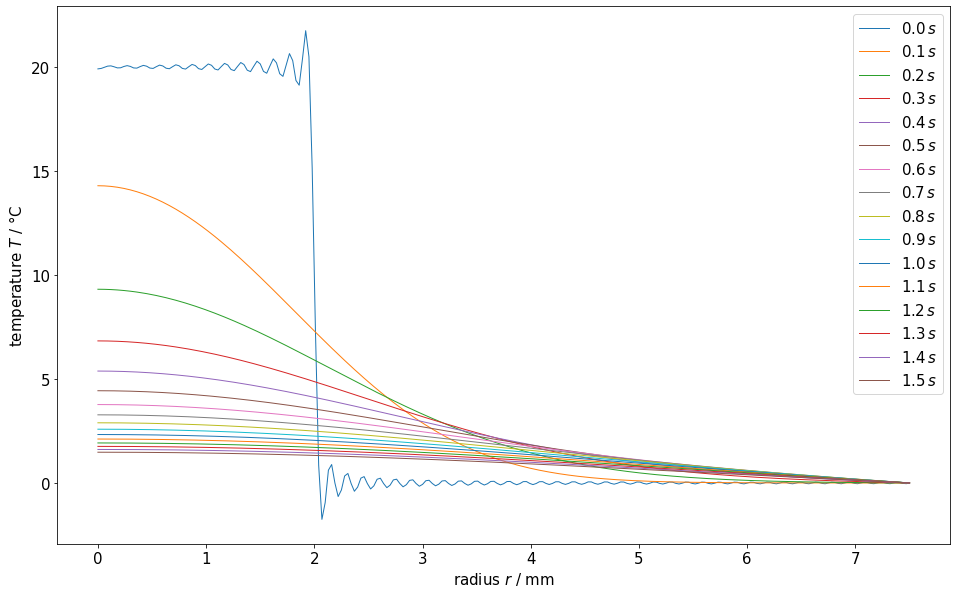

In [21]:
sz_h = 16.
sz_v = sz_h / gr
plt.figure(figsize = (sz_h, sz_v))

plt.plot(r_vals, u_vals00, '-', lw = 1., label = r'$0.0\,s$')
plt.plot(r_vals, u_vals01, '-', lw = 1., label = r'$0.1\,s$')
plt.plot(r_vals, u_vals02, '-', lw = 1., label = r'$0.2\,s$')
plt.plot(r_vals, u_vals03, '-', lw = 1., label = r'$0.3\,s$')
plt.plot(r_vals, u_vals04, '-', lw = 1., label = r'$0.4\,s$')
plt.plot(r_vals, u_vals05, '-', lw = 1., label = r'$0.5\,s$')
plt.plot(r_vals, u_vals06, '-', lw = 1., label = r'$0.6\,s$')
plt.plot(r_vals, u_vals07, '-', lw = 1., label = r'$0.7\,s$')
plt.plot(r_vals, u_vals08, '-', lw = 1., label = r'$0.8\,s$')
plt.plot(r_vals, u_vals09, '-', lw = 1., label = r'$0.9\,s$')
plt.plot(r_vals, u_vals10, '-', lw = 1., label = r'$1.0\,s$')
plt.plot(r_vals, u_vals11, '-', lw = 1., label = r'$1.1\,s$')
plt.plot(r_vals, u_vals12, '-', lw = 1., label = r'$1.2\,s$')
plt.plot(r_vals, u_vals13, '-', lw = 1., label = r'$1.3\,s$')
plt.plot(r_vals, u_vals14, '-', lw = 1., label = r'$1.4\,s$')
plt.plot(r_vals, u_vals15, '-', lw = 1., label = r'$1.5\,s$')
plt.xlabel('radius $r$ / mm')
plt.ylabel('temperature $T$ / °C')
# plt.title(r'PTC Twiss analysis (5D v. 6D) for the Los Alamos PSR')
plt.legend()
plt.show()


### $\varepsilon = 2.5\,\mathrm{mm}$

In [22]:
u0  = 20.00  # / °C
alf =  7.98  # / mm^2 / s
a   =  7.50  # / mm
eps =  2.50  # / mm

nmax = 100

In [23]:
npts = 250
dr = a / npts
r_vals = [ dr * f for f in range(0, npts + 1)]
u_vals00 = [ ufb(u0, alf, a, eps, nmax, r, 0.0) for r in r_vals ]
u_vals01 = [ ufb(u0, alf, a, eps, nmax, r, 0.1) for r in r_vals ]
u_vals02 = [ ufb(u0, alf, a, eps, nmax, r, 0.2) for r in r_vals ]
u_vals03 = [ ufb(u0, alf, a, eps, nmax, r, 0.3) for r in r_vals ]
u_vals04 = [ ufb(u0, alf, a, eps, nmax, r, 0.4) for r in r_vals ]
u_vals05 = [ ufb(u0, alf, a, eps, nmax, r, 0.5) for r in r_vals ]
u_vals06 = [ ufb(u0, alf, a, eps, nmax, r, 0.6) for r in r_vals ]
u_vals07 = [ ufb(u0, alf, a, eps, nmax, r, 0.7) for r in r_vals ]
u_vals08 = [ ufb(u0, alf, a, eps, nmax, r, 0.8) for r in r_vals ]
u_vals09 = [ ufb(u0, alf, a, eps, nmax, r, 0.9) for r in r_vals ]
u_vals10 = [ ufb(u0, alf, a, eps, nmax, r, 1.0) for r in r_vals ]
u_vals11 = [ ufb(u0, alf, a, eps, nmax, r, 1.1) for r in r_vals ]
u_vals12 = [ ufb(u0, alf, a, eps, nmax, r, 1.2) for r in r_vals ]
u_vals13 = [ ufb(u0, alf, a, eps, nmax, r, 1.3) for r in r_vals ]
u_vals14 = [ ufb(u0, alf, a, eps, nmax, r, 1.4) for r in r_vals ]
u_vals15 = [ ufb(u0, alf, a, eps, nmax, r, 1.5) for r in r_vals ]

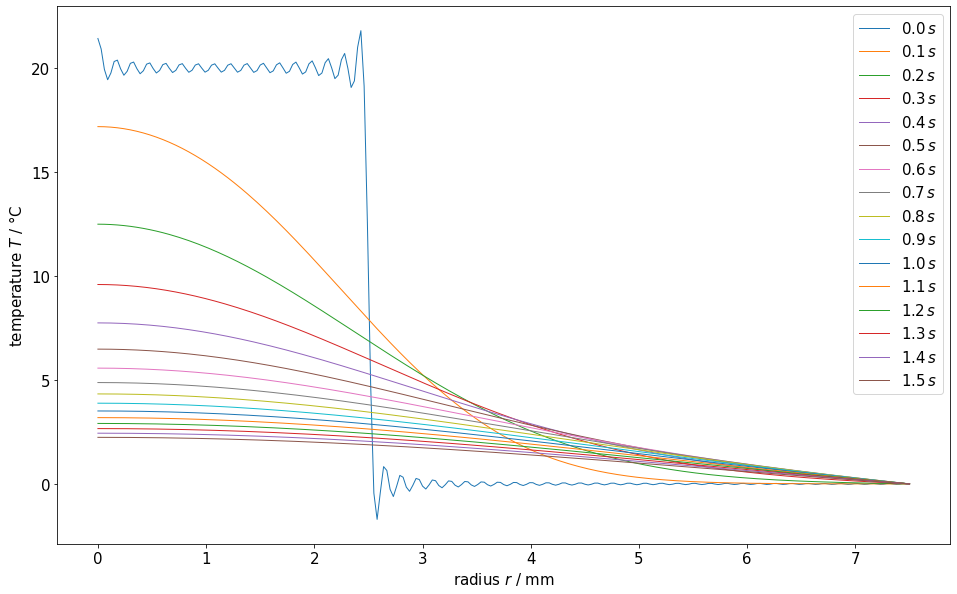

In [24]:
sz_h = 16.
sz_v = sz_h / gr
plt.figure(figsize = (sz_h, sz_v))

plt.plot(r_vals, u_vals00, '-', lw = 1., label = r'$0.0\,s$')
plt.plot(r_vals, u_vals01, '-', lw = 1., label = r'$0.1\,s$')
plt.plot(r_vals, u_vals02, '-', lw = 1., label = r'$0.2\,s$')
plt.plot(r_vals, u_vals03, '-', lw = 1., label = r'$0.3\,s$')
plt.plot(r_vals, u_vals04, '-', lw = 1., label = r'$0.4\,s$')
plt.plot(r_vals, u_vals05, '-', lw = 1., label = r'$0.5\,s$')
plt.plot(r_vals, u_vals06, '-', lw = 1., label = r'$0.6\,s$')
plt.plot(r_vals, u_vals07, '-', lw = 1., label = r'$0.7\,s$')
plt.plot(r_vals, u_vals08, '-', lw = 1., label = r'$0.8\,s$')
plt.plot(r_vals, u_vals09, '-', lw = 1., label = r'$0.9\,s$')
plt.plot(r_vals, u_vals10, '-', lw = 1., label = r'$1.0\,s$')
plt.plot(r_vals, u_vals11, '-', lw = 1., label = r'$1.1\,s$')
plt.plot(r_vals, u_vals12, '-', lw = 1., label = r'$1.2\,s$')
plt.plot(r_vals, u_vals13, '-', lw = 1., label = r'$1.3\,s$')
plt.plot(r_vals, u_vals14, '-', lw = 1., label = r'$1.4\,s$')
plt.plot(r_vals, u_vals15, '-', lw = 1., label = r'$1.5\,s$')
plt.xlabel('radius $r$ / mm')
plt.ylabel('temperature $T$ / °C')
# plt.title(r'PTC Twiss analysis (5D v. 6D) for the Los Alamos PSR')
plt.legend()
plt.show()


### $\varepsilon = 1.5\,\mathrm{mm}$

In [27]:
u0  = 20.00  # / °C
alf =  7.98  # / mm^2 / s
a   =  7.50  # / mm
eps =  1.50  # / mm

nmax = 100

In [61]:
nts = 150
t_fin = 1.5
dt = t_fin / nts

t_vals = [ dt * t for t in range(0, nts + 1)]
upk_theory = [ ufb(u0, alf, a, 1.5, nmax, 0.0, t) for t in t_vals ]

In [62]:
upk_fenics = [20.0,
    10.414737191389891, 6.002124970611824, 4.204554726220573, 3.235826841928973, 2.630281994493335,
    2.215645277635433, 1.9132593775480098, 1.6819120334022502, 1.497906518944128, 1.3467512291964892,
    1.2192158558164208, 1.1092508449591614, 1.0127989174144432, 0.9270787438357673, 0.850138600392724]

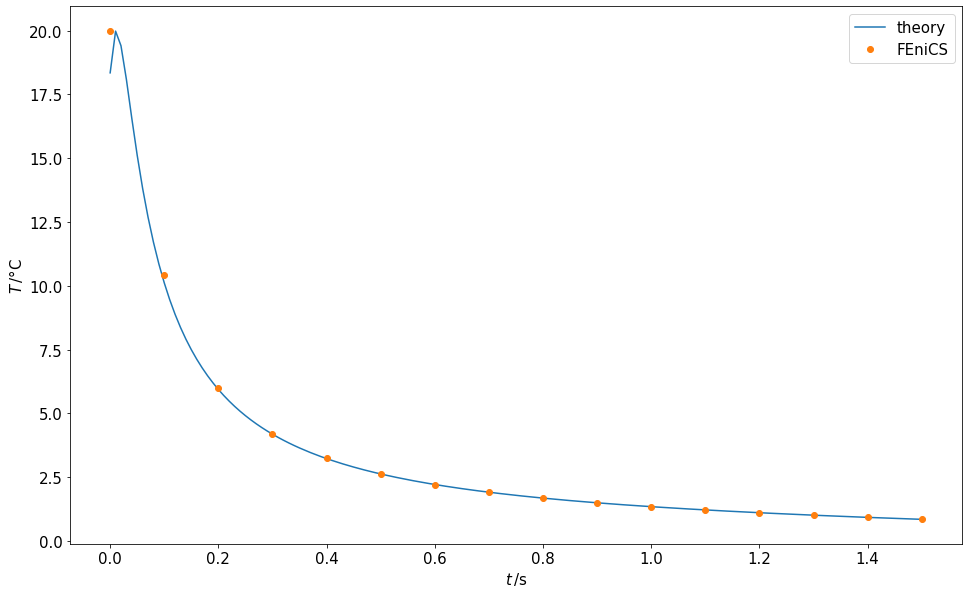

In [63]:
sz_h = 16.
sz_v = sz_h / gr
plt.figure(figsize = (sz_h, sz_v))

tvals = 0.1 * np.array(range(16))
plt.plot(t_vals, upk_theory, '-', label = 'theory')
plt.plot(tvals, upk_fenics, '.', ms = 12, label = 'FEniCS')
plt.xlabel(r'$t\,/\mathrm{s}$')
plt.ylabel(r'$T\,/\mathrm{°C}$')
plt.legend()
plt.show()